In [1]:
import seaborn as sns
sns.set(font_scale=2, style="white")

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style

# import pandas & numpy library
import pandas as pd
import numpy as np

# Statmodels & patsy
import patsy
import statsmodels.api as sm

In [2]:
df = pd.read_csv('chis_data.csv') 
df = df.applymap(lambda x: x.replace('*', '') if isinstance(x, str) else x)
df.to_csv("cleaned_chis_data.csv", index=False)

#Used Chatgpt to figure out error in reading data, asterisks removed
print(df.head())

                                           county  eat5plusveg  noeat5plusveg  \
0                                         alameda         50.2           49.8   
1                                             all         48.7           51.3   
2                                           butte         48.4           51.6   
3                                     contracosta         49.3           50.7   
4  delnortesiskiyoulassentrinitymodocplumassierra         51.4           48.6   

   always_availableveg  usually_availableveg  sometimes_availableveg  \
0                 75.8                  11.9                     7.5   
1                 76.8                  10.7                     8.2   
2                 73.1                  12.3                     8.6   
3                 78.8                  11.2                     5.7   
4                 60.3                  14.8                    13.3   

   never_availableveg  doesn’t_eat_veg underweight  normalweight  ...  \
0      

/tmp/ipykernel_426/3853184053.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace('*', '') if isinstance(x, str) else x)


In [3]:
cleaned_chis_data = pd.read_csv('cleaned_chis_data.csv')
cleaned_chis_data

,county,eat5plusveg,noeat5plusveg,always_availableveg,usually_availableveg,sometimes_availableveg,never_availableveg,doesn’t_eat_veg,underweight,normalweight,...,Has been Diagnosed with Heart Disease,Has been Diagnosed with Heart Disease,Population,Latino,White,Black,American_Indian/Alaska_Native,Asian,Native_Hawaiian/Pacific_Islander,Mixed
0,alameda,50.2,49.8,75.8,11.9,7.5,3.5,1.4,2.0,42.4,...,5.7%,94.3%,"1,230,000",21.4,35.1,11.3,0.3,28.2,0.7,3.1
1,all,48.7,51.3,76.8,10.7,8.2,3.6,0.8,2.0,36.7,...,6.5%,93.5%,"29,008,000",36.2,41.3,5.6,0.5,14.1,0.4,2.1
2,butte,48.4,51.6,73.1,12.3,8.6,4.8,1.1,1.6,37.5,...,6.9%,93.1%,"169,000",14.6,75.2,1.3,1.4,4.0,NaN,3.1
3,contracosta,49.3,50.7,78.8,11.2,5.7,3.6,0.7,1.5,37.3,...,6.5%,93.5%,"868,000",23.4,47.7,8.7,0.3,16.5,0.5,2.9
4,delnortesiskiyoulassentrinitymodocplumassierra,51.4,48.6,60.3,14.8,13.3,9.7,1.9,1.8,35.3,...,9.1%,90.9%,"107,000",11.7,79.4,0.5,3.3,0.8,0.8,3.5
5,eldorado,52.7,47.3,79.5,8.0,5.1,6.0,1.5,2.4,40.2,...,8.6%,91.4%,"146,000",12.0,79.7,1.2,1.0,3.5,NaN,2.4
6,fresno,47.5,52.5,69.2,13.3,11.8,5.1,0.6,1.6,26.5,...,7.3%,92.7%,"693,000",48.5,34.4,5.1,0.9,9.6,NaN,1.4
7,humboldt,54.3,45.7,77.9,9.0,7.0,5.0,1.0,1.8,36.6,...,8.2%,91.8%,"102,000",11.5,78.1,0.7,3.3,2.0,NaN,3.8
8,imperial,46.1,53.9,66.9,13.7,11.7,6.2,1.6,1.8,23.4,...,7.7%,92.3%,"120,000",81.3,14.3,0.9,0.8,1.9,NaN,0.8
9,kern,53.4,46.6,69.9,13.3,10.1,6.1,0.6,1.1,25.6,...,6.3%,93.7%,"594,000",47.9,41.5,4.5,0.9,3.8,0.2,1.1


In [4]:
afford_veg = cleaned_chis_data[['county','always_affordveg','usually_affordveg','sometimes_affordveg','never_affordveg']]
afford_veg.head()
print(afford_veg.columns)

Index(['county', 'always_affordveg', 'usually_affordveg',
       'sometimes_affordveg', 'never_affordveg'],
      dtype='object')


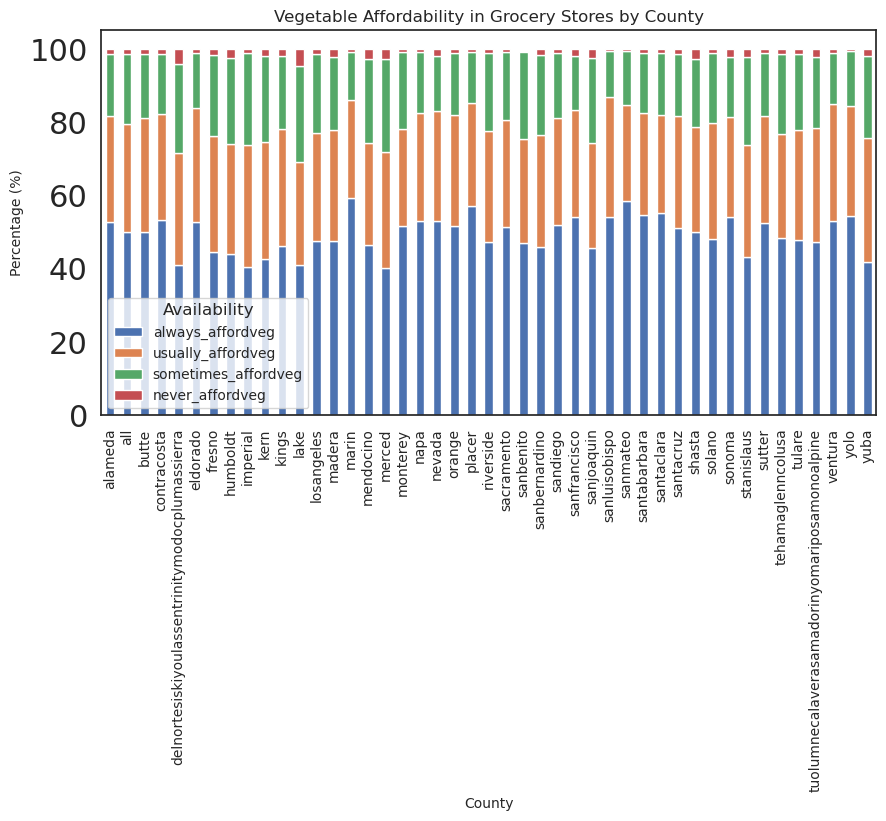

In [5]:
counties = afford_veg['county'].tolist()
ax = afford_veg.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.xlabel("County", fontsize=10)
plt.ylabel("Percentage (%)", fontsize=10)
plt.title("Vegetable Affordability in Grocery Stores by County", fontsize=12)
plt.xticks(ticks=range(len(counties)), labels=counties, rotation=90, fontsize= 10)
plt.legend(title="Availability", title_fontsize = 12, loc='lower left', fontsize= 10)
plt.show()
# I used Marissa's code structure to make our graphs more uniform for readability

In [8]:
#What are the distributions of income across counties? 

In [9]:
income = cleaned_chis_data[['county','income 5000_or_less','income 5001_to_10000','income 10001_to_15000','income 15001_to_20000','income 20001_to_30000','income 30001_to_40000','income 40001_to_50000','income 50001_to_60000','income 60001_to_70000','income 70001_to_80000','income 80001_to_90000','income 90001_to_100000','income 100001_to_135000','income 135000_above']]
income.head()

,county,income 5000_or_less,income 5001_to_10000,income 10001_to_15000,income 15001_to_20000,income 20001_to_30000,income 30001_to_40000,income 40001_to_50000,income 50001_to_60000,income 60001_to_70000,income 70001_to_80000,income 80001_to_90000,income 90001_to_100000,income 100001_to_135000,income 135000_above
0,alameda,2.8,2.7,4.5,4.7,6.6,6.9,6.4,5.8,5.2,5.7,3.8,5.8,9.3,29.7
1,all,3.9,3.6,5.5,5.5,10.4,8.5,7.6,6.1,5.1,6.0,4.0,5.8,8.5,19.6
2,butte,5.5,3.3,7.1,6.0,12.1,10.6,8.8,8.4,4.9,6.3,4.1,4.7,7.9,10.3
3,contracosta,2.7,1.8,3.1,3.2,7.1,6.6,6.5,5.2,4.8,6.0,4.6,7.1,9.6,31.5
4,delnortesiskiyoulassentrinitymodocplumassierra,5.5,4.1,7.1,4.9,13.4,10.6,7.1,7.1,7.6,7.5,4.4,4.2,7.3,9.1


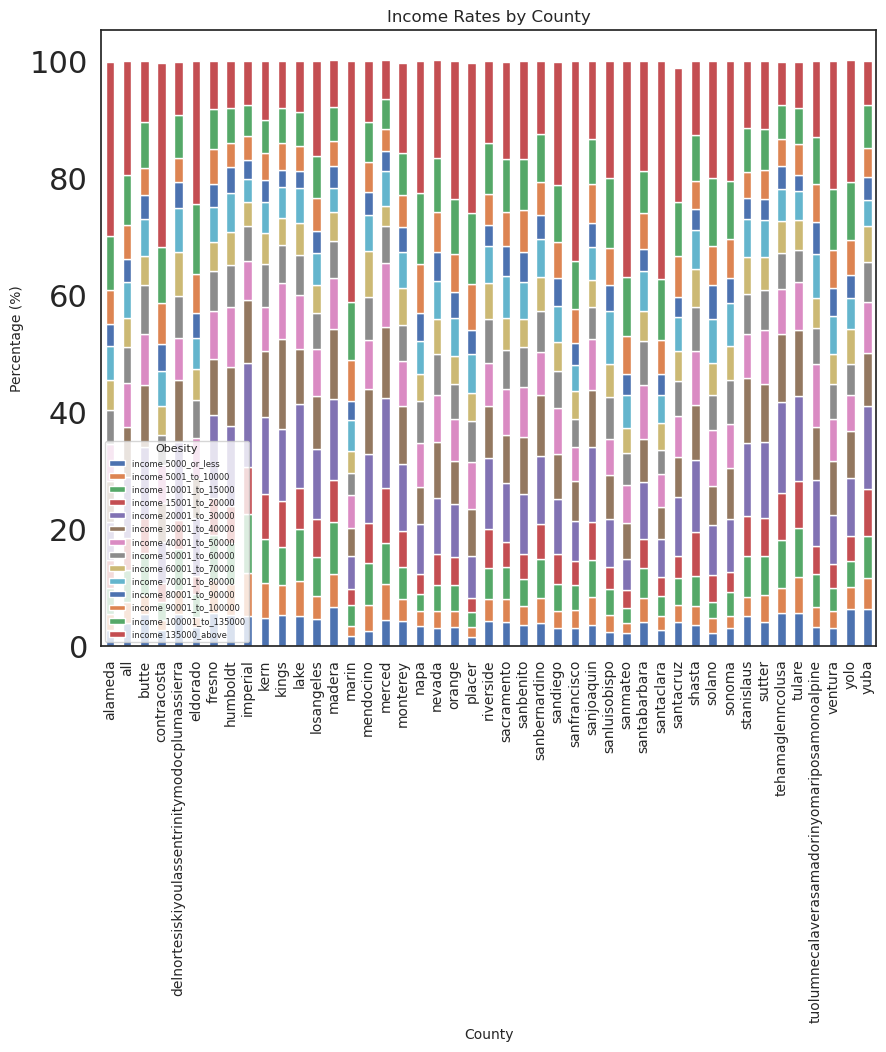

In [10]:
counties = income['county'].tolist()
ax = income.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.xlabel("County", fontsize=10) 
plt.ylabel("Percentage (%)", fontsize=10) 
plt.title("Income Rates by County", fontsize=12)
plt.xticks(ticks=range(len(counties)), labels=counties, rotation=90, fontsize= 10)
plt.legend(title="Obesity", title_fontsize= 8, loc='lower left', fontsize = 6)
plt.show()

In [ ]:
#Is there a relationship between Vegetable affordability and Income rates across counties? 

In [ ]:
##Is there a coorelation between the rates of people who always have access to healthy vegetables and those in the highest bracket of income?

In [26]:
vegavail_highincome = cleaned_chis_data[['county', 'always_availableveg','income 135000_above']]
vegavail_highincome.head()

,county,always_availableveg,income 135000_above
0,alameda,75.8,29.7
1,all,76.8,19.6
2,butte,73.1,10.3
3,contracosta,78.8,31.5
4,delnortesiskiyoulassentrinitymodocplumassierra,60.3,9.1


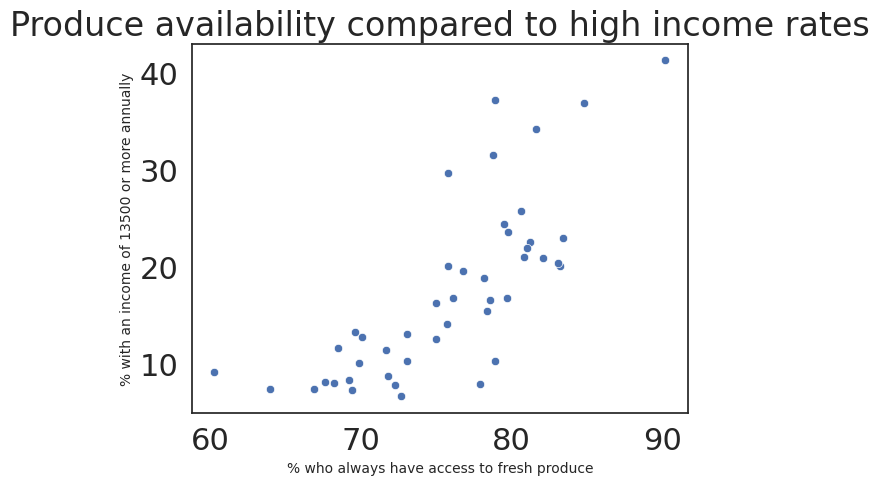

In [29]:
sns.scatterplot(data=vegavail_highincome, x='always_availableveg', y='income 135000_above')
plt.xlabel("% who always have access to fresh produce", fontsize=10) 
plt.ylabel("% with an income of 13500 or more annually", fontsize = 10)
plt.title("Produce availability compared to high income rates") 
plt.show()

In [30]:
##Is there a coorelation between the rates of people who always have access to healthy vegetables and those in the lowest bracket of income?

In [35]:
vegavail_lowincome = cleaned_chis_data[['county', 'always_availableveg','income 5000_or_less']]
vegavail_lowincome.head()

,county,always_availableveg,income 5000_or_less
0,alameda,75.8,2.8
1,all,76.8,3.9
2,butte,73.1,5.5
3,contracosta,78.8,2.7
4,delnortesiskiyoulassentrinitymodocplumassierra,60.3,5.5


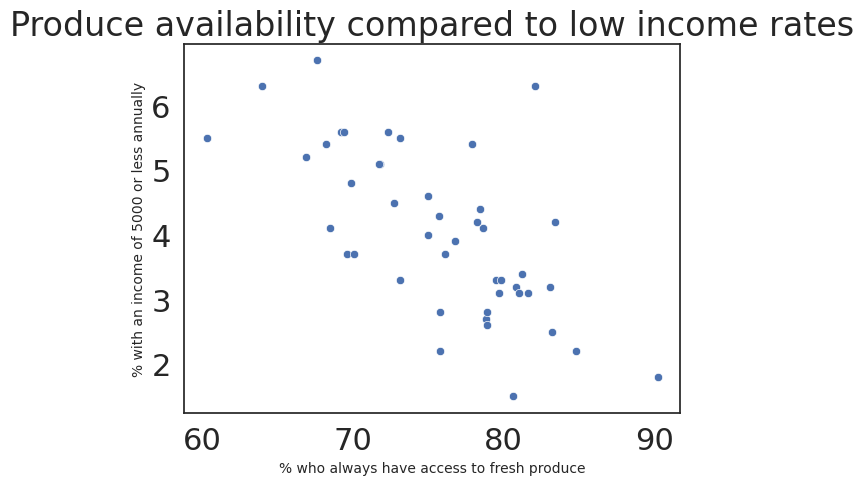

In [36]:
sns.scatterplot(data=vegavail_lowincome, x='always_availableveg', y='income 5000_or_less')
plt.xlabel("% who always have access to fresh produce", fontsize=10) 
plt.ylabel("% with an income of 5000 or less annually", fontsize = 10)
plt.title("Produce availability compared to low income rates") 
plt.show()

In [ ]:
#We see a positive coorelation of people with higher income and always having access to healthy groceries and a negative coorelation of people with lower income and always having access to healthy groceries.